In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'D:\data\covid19.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


Columns Detail:
* Province_State --- The name of the State within the USA.
* Country_Region --- The name of the Country (US).
* Last_Update --- The most recent date the file was pushed.
* Lat ---Latitude.
* Long_ --- Longitude.
* Confirmed --- Aggregated confirmed case count for the state.
* Deaths --- Aggregated Death case count for the state.
* Recovered --- Aggregated Recovered case count for the state.
* Active --- Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
* FIPS --- Federal Information Processing Standards code that uniquely identifies counties within the USA.
* Incident_Rate --- confirmed cases per 100,000 persons.
* People_Tested --- Total number of people who have been tested.
* People_Hospitalized --- Total number of people hospitalized.
* Mortality_Rate --- Number recorded deaths * 100/ Number confirmed cases.
* UID --- Unique Identifier for each row entry.
* ISO3 --- Officialy assigned country code identifiers.
* Testing_Rate --- Total number of people tested per 100,000 persons.
* Hospitalization_Rate --- Total number of people hospitalized * 100/ Number of confirmed cases.

In [3]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [4]:
df.shape

(58, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

* The dataset has shape with 58 rows & 18 columns.
* The dataset has 10 float64 , 4 int64 & 4 object as datatype columns.
* The dataset has  null values.

In [6]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

* The missing values are present in the column 'Lat','Long_','Recovered','Incident_Rate','People_Tested','People_Hospitalized', 'Mortality_Rate','Testing_Rate','Hospitalization_Rate'.
* All the columns having missing data are of numerical datatype, so imputtung the data with mean.

In [7]:
# Imputing the missing values

In [8]:
for col in ['Lat', 'Long_','Recovered','Incident_Rate','People_Tested',
            'People_Hospitalized', 'Mortality_Rate','Testing_Rate', 'Hospitalization_Rate']:
    df[col].fillna(df[col].mean(),inplace=True)

In [9]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,ASM,222.857246,14.342541
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,USA,3189.670370,10.693584


In [10]:
# Summary Statistic

In [11]:
df.describe(include='all')

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58,58,58,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58,58.000000,58.000000
unique,58,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,Vermont,US,2020-05-21 02:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN
freq,1,58,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,NaN
mean,NaN,NaN,NaN,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,NaN,3894.186870,14.342541
std,NaN,NaN,NaN,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,NaN,1898.951207,3.781861
min,NaN,NaN,NaN,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,NaN,97.702058,6.778043
25%,NaN,NaN,NaN,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,NaN,2741.843521,12.829963
50%,NaN,NaN,NaN,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,NaN,3501.526835,14.342541
75%,NaN,NaN,NaN,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,NaN,4622.586404,15.552021


In [12]:
for col in df.columns:
    print(df[col].unique(),'\n')

['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming'] 

['US'] 

['2020-05-21 02:32:54'] 

[ 32.3182      61.3707     -14.271       33.7298      34.9697
  36.1162      39.0598      41.5978      39.3185      36.84008929
  38.8974      27.7663      33.0406      13.4443      21.0943
  44.2405      40.3495      39.8494      42.0115

* The column 'Country_Region' &	'Last_Update' contain unique values.
* The column "Confirmed" has max staandard deviation.
* The outliers are present in the datase.

In [13]:
df.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,2.645628e-02,-0.134906,7.727677e-01,0.309579,-6.625465e-02
Long_,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,7.967739e-02,0.297192,-5.259975e-01,0.190191,7.138145e-02
Confirmed,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,8.692673e-01,0.382537,1.539717e-01,0.332464,2.874708e-01
Deaths,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,9.082786e-01,0.427127,1.200429e-01,0.344465,2.982254e-01
Recovered,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,7.618294e-01,0.322160,1.303142e-01,0.220597,2.316917e-01
Active,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,8.359377e-01,0.367626,1.463538e-01,0.321395,2.845637e-01
FIPS,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,9.150251e-06,-0.262178,5.802216e-02,-0.000100,-1.176128e-04
Incident_Rate,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,5.510764e-01,0.353882,2.643102e-01,0.620621,1.960289e-01
People_Tested,0.084769,-0.077781,0.824136,0.739634,0.711255,0.826144,-0.000209,0.441669,1.000000,6.420913e-01,0.220200,2.356350e-01,0.230753,2.526802e-01
People_Hospitalized,0.026456,0.079677,0.869267,0.908279,0.761829,0.835938,0.000009,0.551076,0.642091,1.000000e+00,0.334335,6.697668e-09,0.270255,3.775863e-01


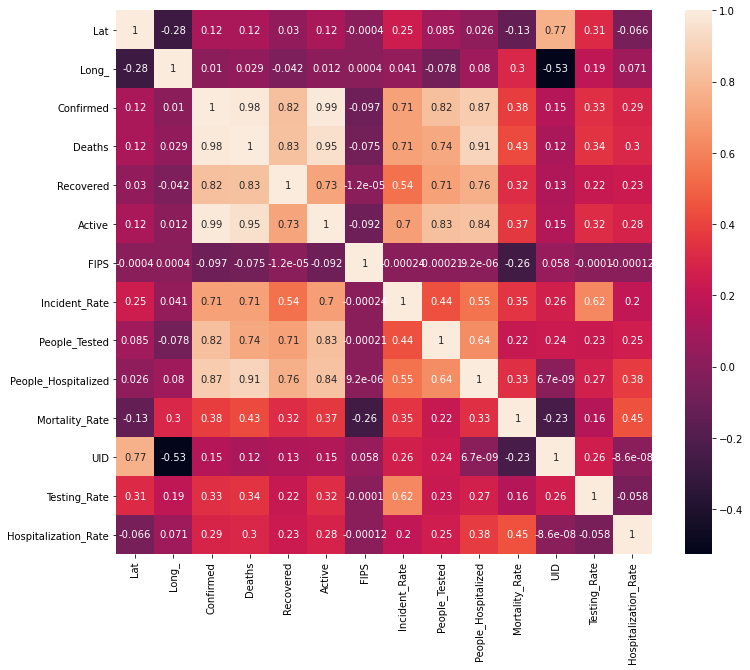

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

* The column 'Confirmed','Recovered', 'Active', 'Incident_Rate','People_Tested', 'People_Hospitalized' are highly positively correlated with the 'Deaths'column.

In [15]:
# Drop the columns

In [16]:
df.drop(['Country_Region','Last_Update'],axis=1,inplace=True)

In [17]:
df.shape

(58, 16)

* The column 'Country_Region' & 'Last_Update' contain only one type of values, Hence mostly irrelevent with the column 'Deaths'.

28636


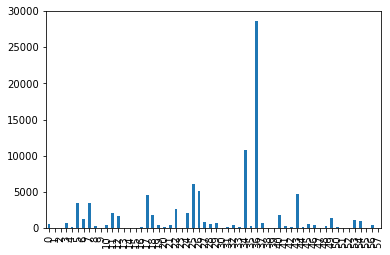

In [18]:
df['Deaths'].plot.bar()
print(df['Deaths'].max())

* The maximum deaths are 28636.

354370


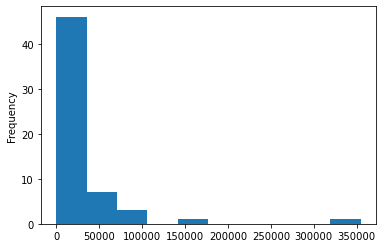

In [19]:
df['Confirmed'].plot.hist()
print(df['Confirmed'].max())

* The maximun confirmed cases are 354370.

61886.0


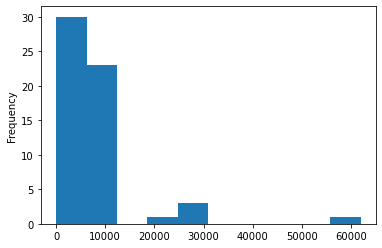

In [20]:
df['Recovered'].plot.hist()
print(df['Recovered'].max())

* The maximum no of Recovered cases are 61886.

263848.0


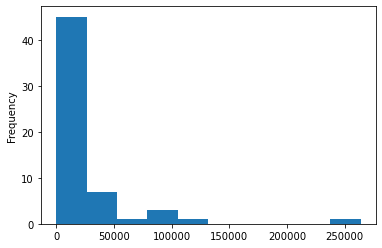

In [21]:
df['Active'].plot.hist()
print(df['Active'].max())

* The maximum no of Active cases are 263848.

1821.6202164734773


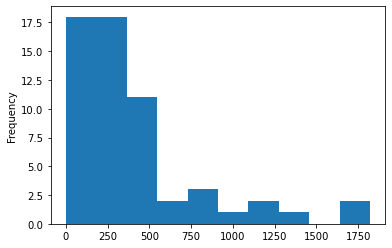

In [22]:
df['Incident_Rate'].plot.hist()
print(df['Incident_Rate'].max())

* The maximum Incident_Rate is 1821.62.

1505836.0


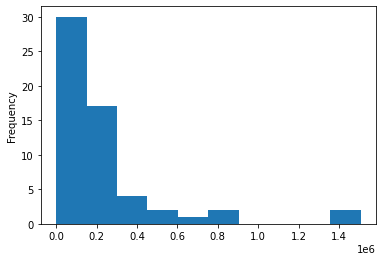

In [23]:
df['People_Tested'].plot.hist()
print(df['People_Tested'].max())

* The maximum no of People_Tested are 1505836 . 

76410.0


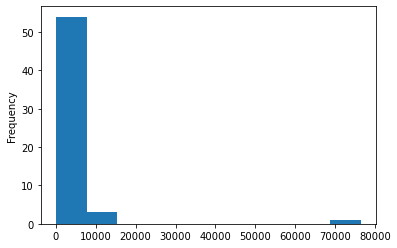

In [24]:
df['People_Hospitalized'].plot.hist()
print(df['People_Hospitalized'].max())

* The maximum no of People_Hospitalized are 76410.

9.54554886905997


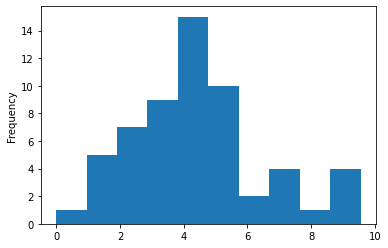

In [25]:
df['Mortality_Rate'].plot.hist()
print(df['Mortality_Rate'].max())

* The maximum Mortality_Rate is 9.5455.

11377.4246928101


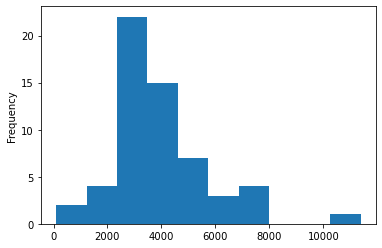

In [26]:
df['Testing_Rate'].plot.hist()
print(df['Testing_Rate'].max())

* The maximum Testing_Rate is11377.42.

28.05443780916011


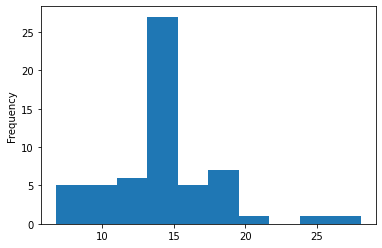

In [27]:
df['Hospitalization_Rate'].plot.hist()
print(df['Hospitalization_Rate'].max())

* The maximum Hospitalization_Rate is 28.054.

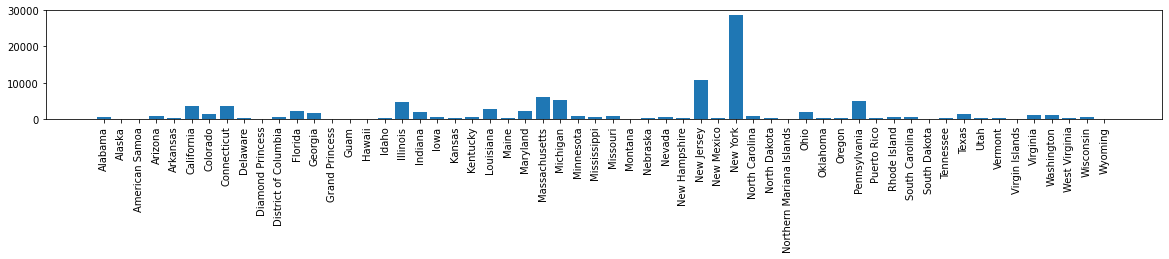

In [28]:
plt.figure(figsize=(20,2))
plt.bar(df['Province_State'],df['Deaths'])
plt.xticks(rotation=90)
plt.show()

* 'New York' has maximum death cases i.e 28636.

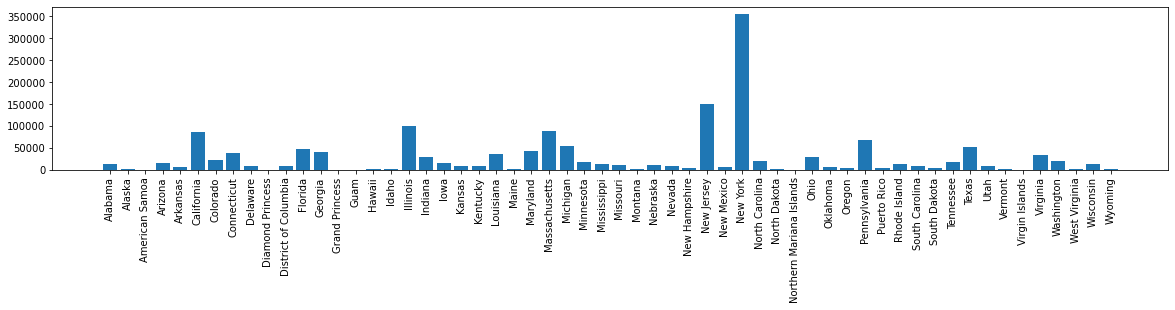

In [29]:
plt.figure(figsize=(20,3))
plt.bar(df['Province_State'],df['Confirmed'])
plt.xticks(rotation=90)
plt.show()

* The 'New York' has maximum no of Confirmed cases i.e 354370.

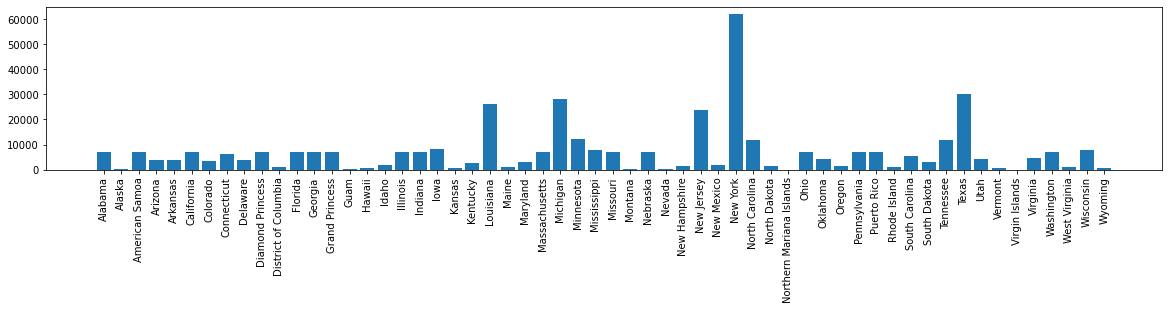

In [30]:
plt.figure(figsize=(20,3))
plt.bar(df['Province_State'],df['Recovered'])
plt.xticks(rotation=90)
plt.show()

* The 'New york' has maximum no of Recovered cases i.e 61886.

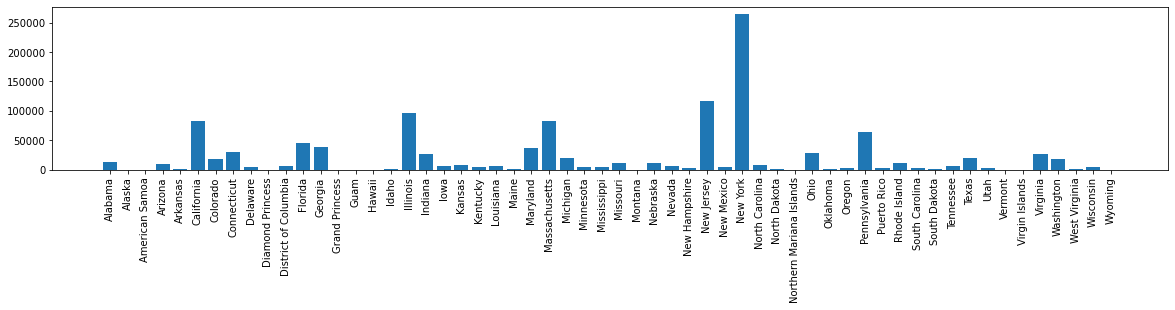

In [31]:
plt.figure(figsize=(20,3))
plt.bar(df['Province_State'],df['Active'])
plt.xticks(rotation=90)
plt.show()

* The 'New york' has maximum no of Active cases i.e 263848.

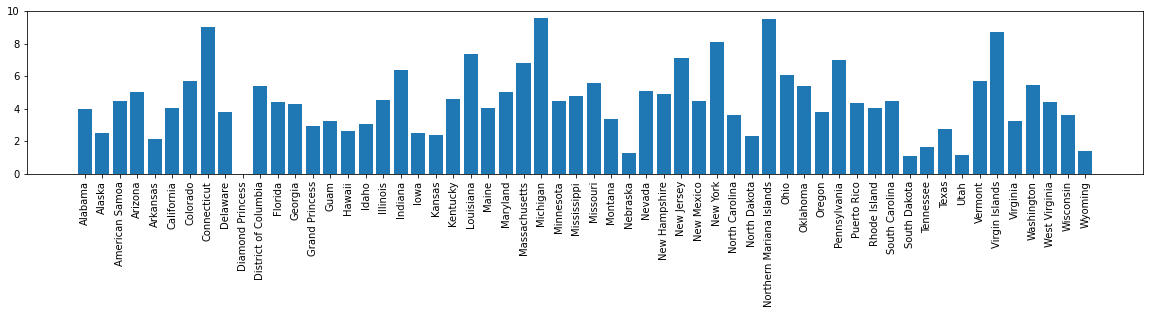

In [32]:
plt.figure(figsize=(20,3))
plt.bar(df['Province_State'],df['Mortality_Rate'])
plt.xticks(rotation=90)
plt.show()

* The 'Michigan' has maximum mortality rate i.e 9.545.

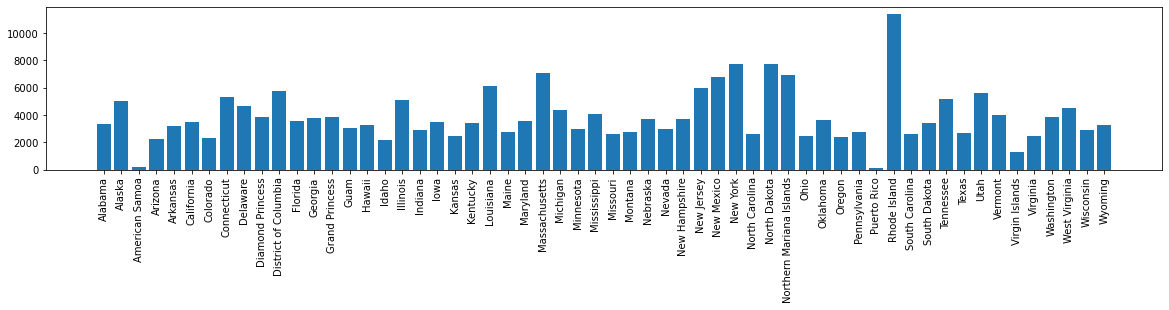

In [33]:
plt.figure(figsize=(20,3))
plt.bar(df['Province_State'],df['Testing_Rate'])
plt.xticks(rotation=90)
plt.show()

* The 'Rhode Island'has maximum Testing rate i.e 11377.42.

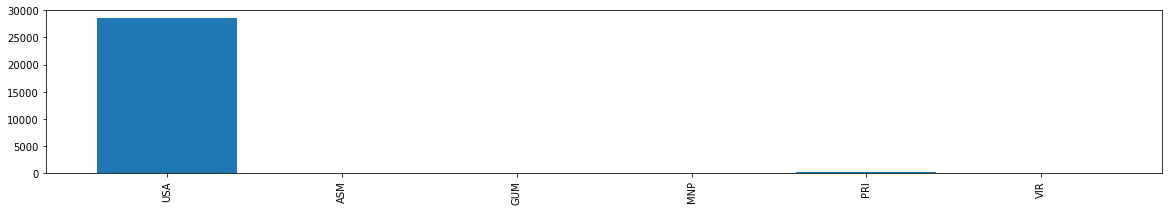

In [34]:
plt.figure(figsize=(20,3))
plt.bar(df['ISO3'],df['Deaths'])
plt.xticks(rotation=90)
plt.show()

* Officialy assigned country code identifiers(ISO3) are mostly from USA.

In [35]:
# Categorical data is converted into numerical data.

In [36]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

list=['Province_State','ISO3'];

for val in list:
    df[val]=le.fit_transform(df[val])

* The datatype of columns 'Province_State' & 'ISO3' are 'object'  so the values in these columns are changed into numerical datatype.

In [37]:
# To check Outliers with Boxplot methord

Province_State             AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Lat                     AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Long_                   AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Confirmed               AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Deaths                  AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Recovered               AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
Active                  AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
FIPS                    AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Incident_Rate                 AxesSubplot(0.125,0.125;0.0824468x0.343182)
People_Tested              AxesSubplot(0.223936,0.125;0.0824468x0.343182)
People_Hospitalized        AxesSubplot(0.322872,0.125;0.0824468x0.343182)
Mortality_Rate             AxesSubplot(0.421809,0.125;0.0824468x0.343182)
UID                        AxesSubplot(0.520745,0.125;0.0824468x0.343182)
ISO3                       AxesSubplot

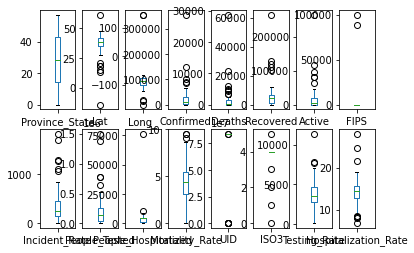

In [38]:
df.plot(kind='box',subplots=True,layout=(2,8))

* The Boxplot methord shows the outliers are present in the dataset.

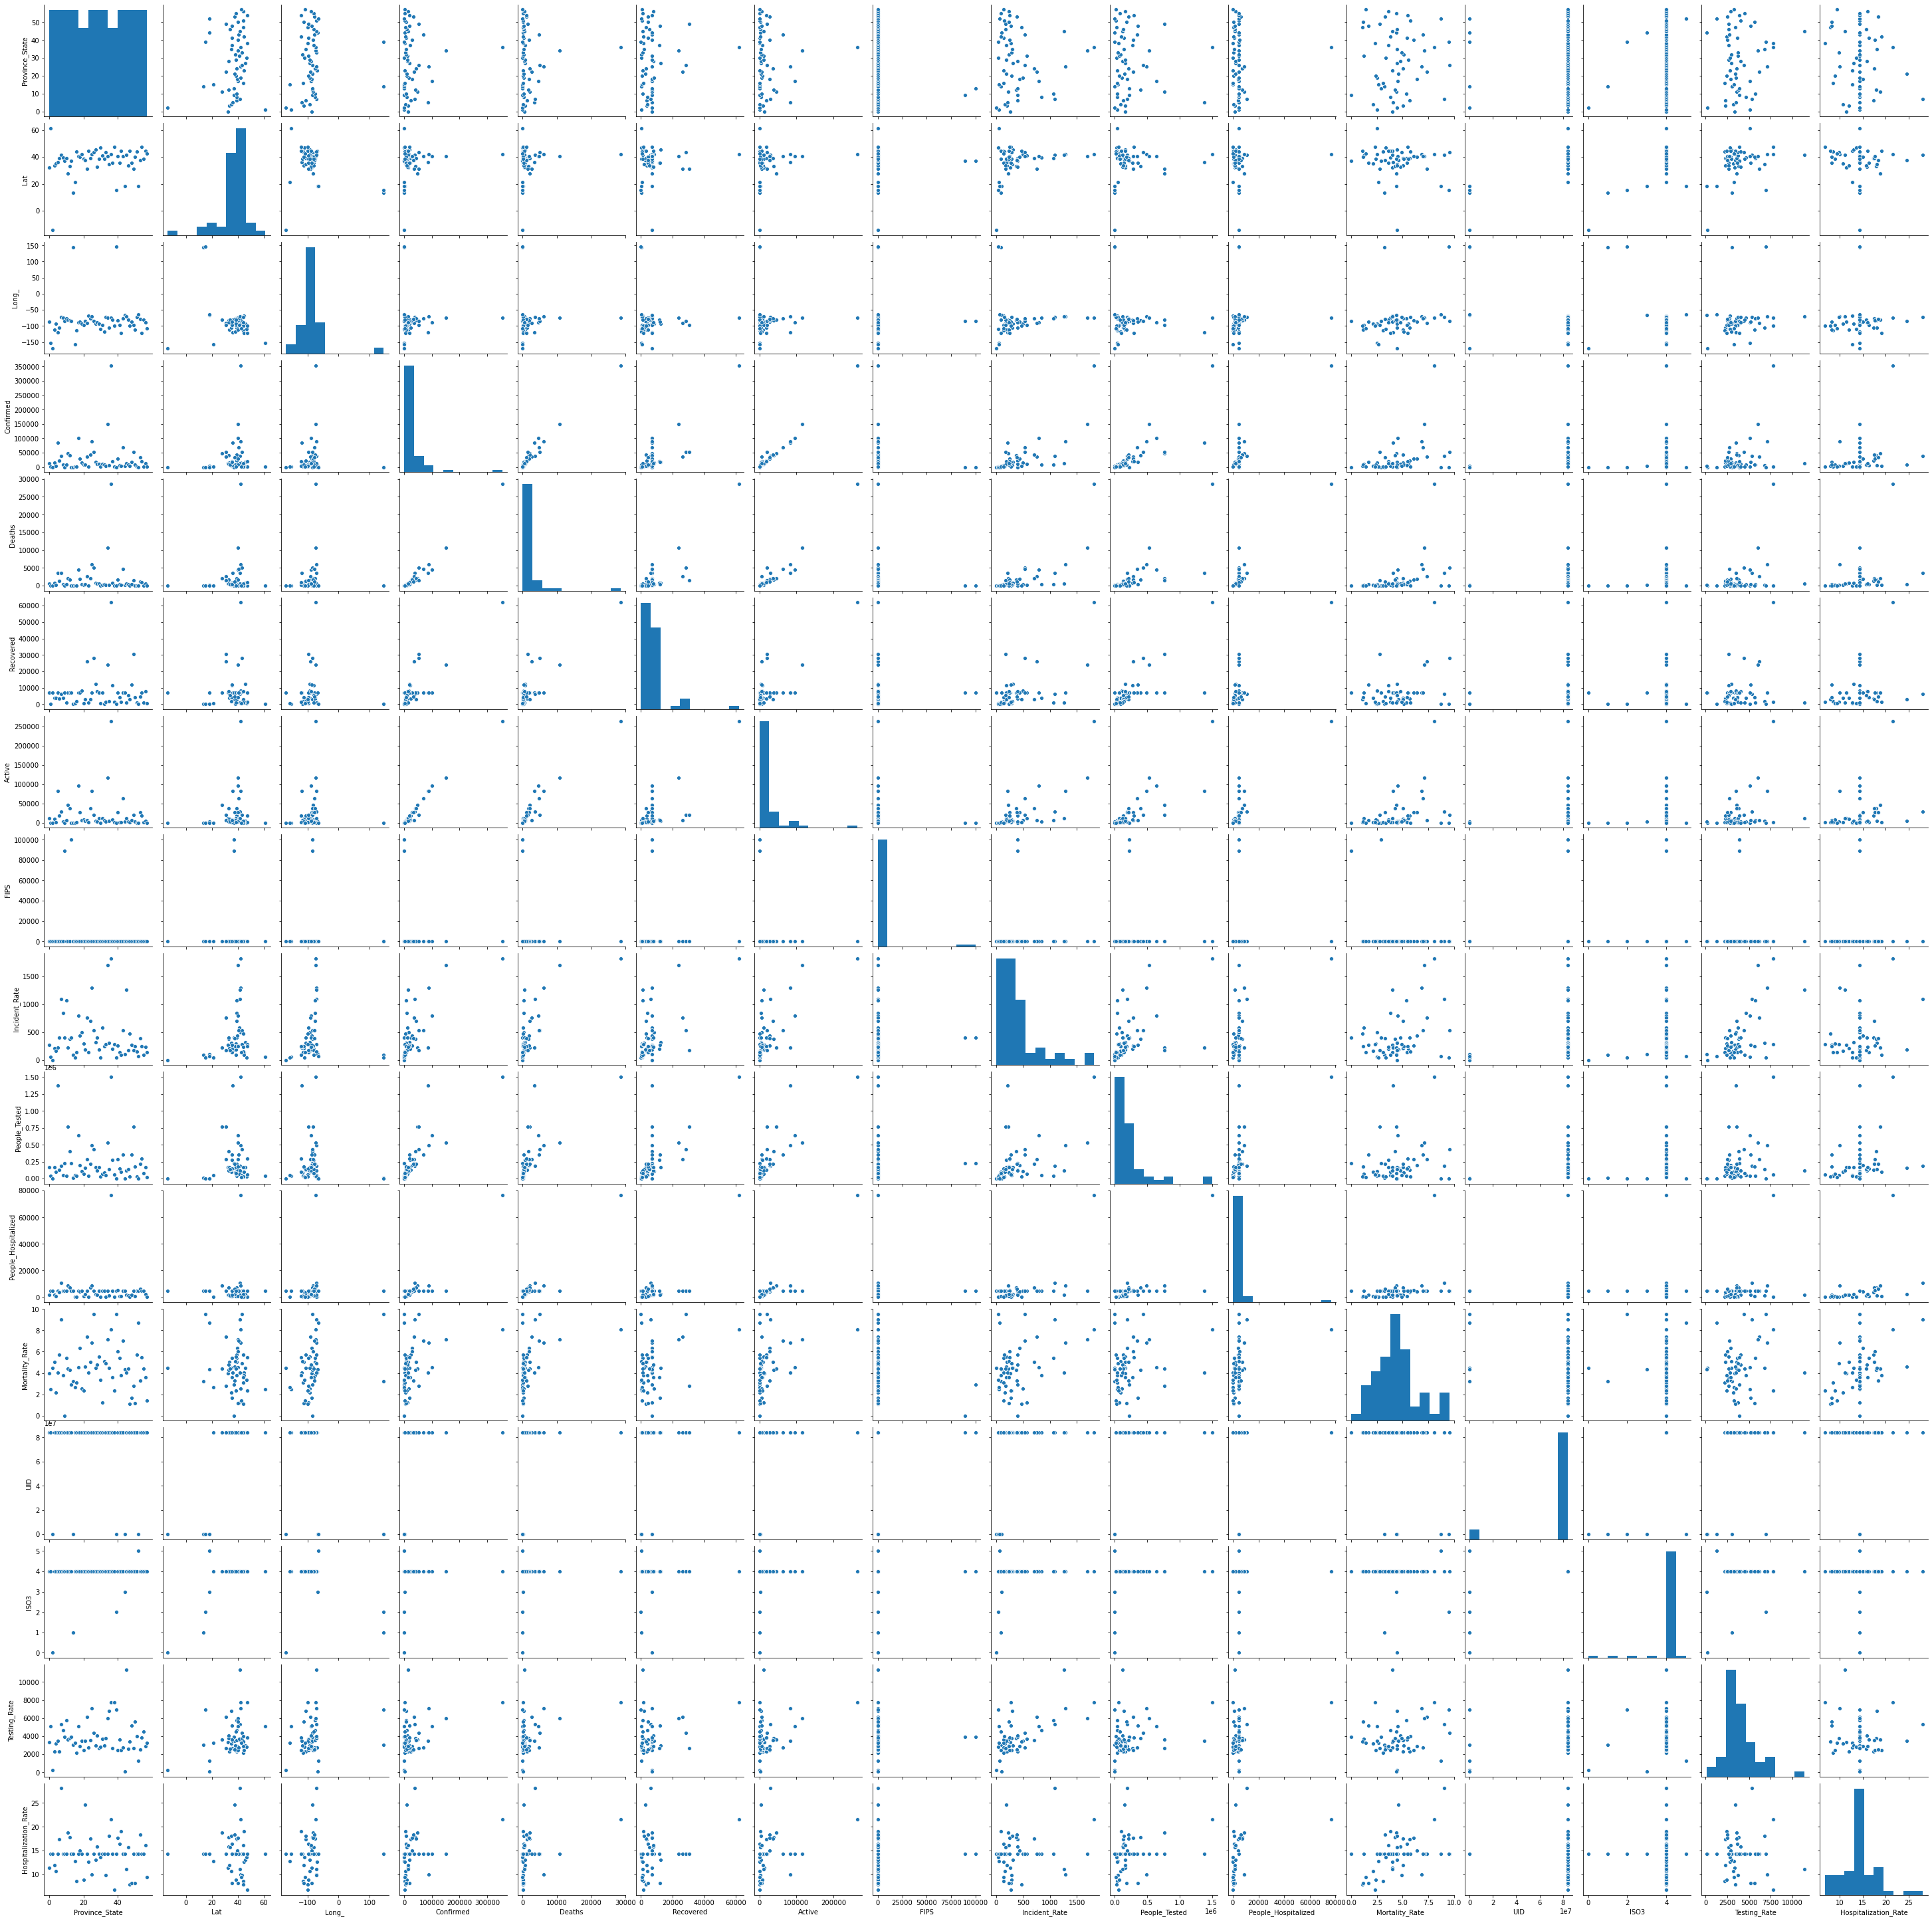

In [39]:
sns.pairplot(df)

In [40]:
# Remove outliers

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.70244092e+00, 4.26523477e-01, 3.49982309e-02, 2.62999251e-01,
        2.68934023e-01, 0.00000000e+00, 1.84202386e-01, 1.90471516e-01,
        3.31615693e-01, 2.11041917e-01, 3.47604767e-01, 2.18727182e-01,
        3.06995177e-01, 2.17198770e-01, 2.86980973e-01, 7.74497410e-01],
       [1.64270615e+00, 2.31382962e+00, 1.38693367e+00, 5.05788407e-01,
        3.95372994e-01, 6.78047590e-01, 4.89328519e-01, 1.90413571e-01,
        8.70668532e-01, 6.48929571e-01, 0.00000000e+00, 9.36418161e-01,
        3.06995220e-01, 2.17198770e-01, 6.21379592e-01, 4.73806709e-16],
       [1.58297138e+00, 4.82101134e+00, 1.75282379e+00, 5.13484119e-01,
        3.97842505e-01, 0.00000000e+00, 4.90281199e-01, 1.87052738e-01,
        1.01045759e+00, 7.75826083e-01, 0.00000000e+00, 4.23371775e-16,
        3.25578286e+00, 5.38170286e+00, 1.95023139e+00, 4.73806709e-16],
       [1.52323661e+00, 2.93375472e-01, 5.41264279e-01, 2.27418578e-01,
        2.13370022e-01, 3.29519951e-01, 2.36575329e-01, 1.902

In [42]:
thresold=3
print(np.where(z>3))

(array([ 2,  2,  2,  5,  7,  9, 13, 14, 14, 14, 34, 36, 36, 36, 36, 36, 36,
       36, 39, 39, 44, 45, 52], dtype=int64), array([ 1, 12, 13,  9, 15,  7,  7,  2, 12, 13,  8,  3,  4,  5,  6,  8,  9,
       10,  2, 12, 12, 14, 12], dtype=int64))


In [43]:
dn=df[(z<3).all(axis=1)]

In [44]:
print(df.shape ,'\t',dn.shape)

(58, 16) 	 (46, 16)


In [45]:
df=dn

The outliers are removed from the data. The old rows are 58 and new rows are 46.

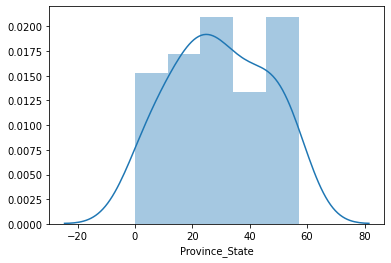

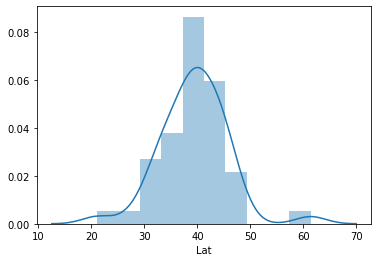

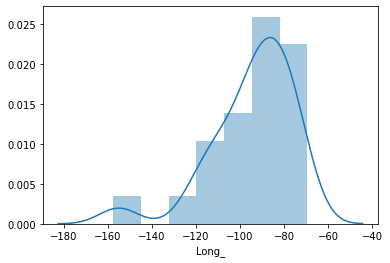

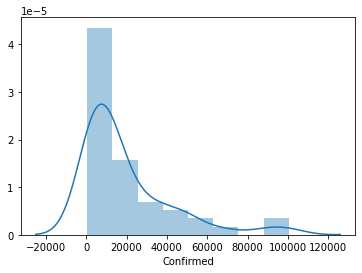

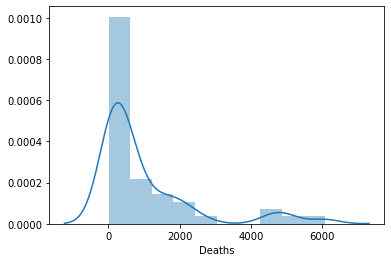

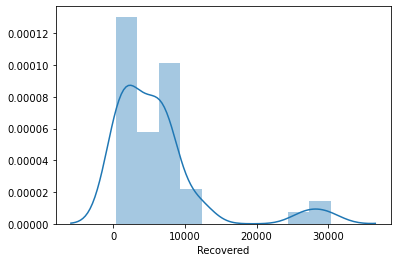

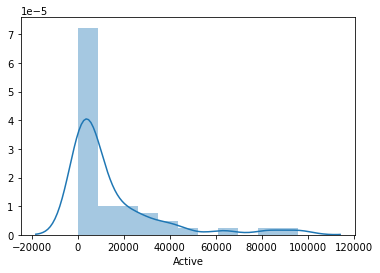

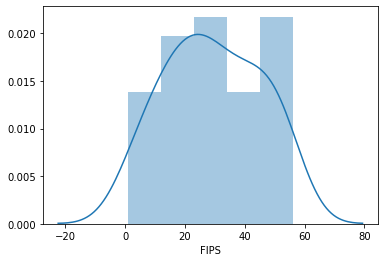

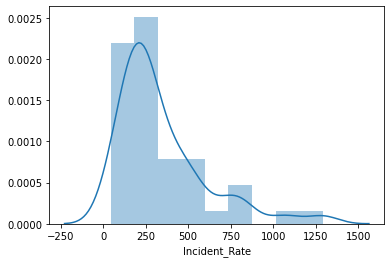

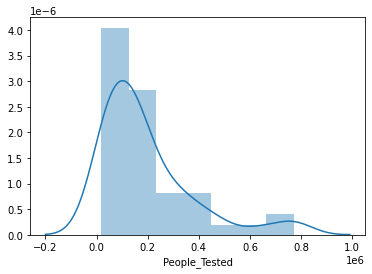

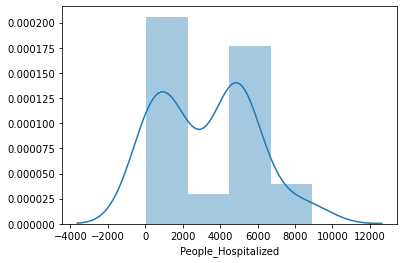

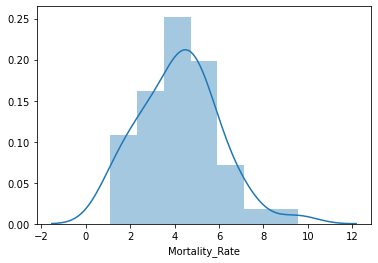

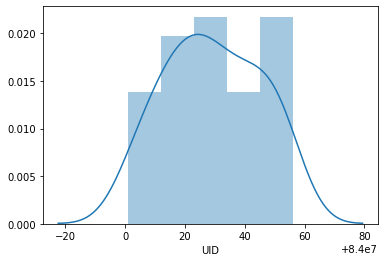

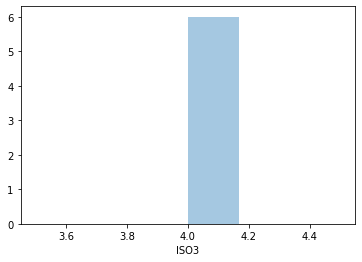

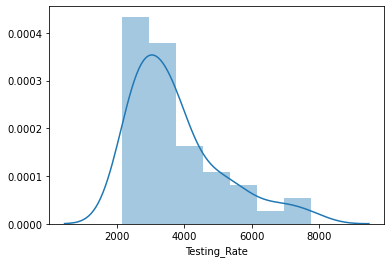

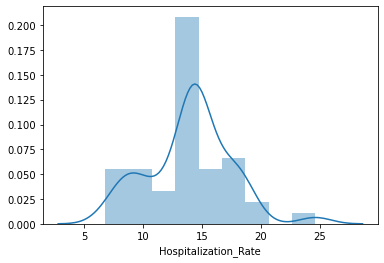

<Figure size 432x288 with 0 Axes>

In [46]:
for i in df.columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.figure()

In [47]:
df.skew()

Province_State         -0.006325
Lat                     0.276390
Long_                  -1.452557
Confirmed               1.916809
Deaths                  2.182344
Recovered               2.386170
Active                  2.432932
FIPS                    0.004318
Incident_Rate           1.705832
People_Tested           1.769735
People_Hospitalized     0.321958
Mortality_Rate          0.397815
UID                     0.004318
ISO3                    0.000000
Testing_Rate            1.281475
Hospitalization_Rate    0.163926
dtype: float64

* The Pairplot & distplot shows the skewnees present in the dataset, df.skew() shows the mathematical representaion of the skewness present in the dataset.

In [48]:
# Remove Skewness

In [49]:
from sklearn.preprocessing import power_transform
print(power_transform(df))

[[-2.06113373e+00 -1.12189154e+00  2.54365072e-01  1.33994817e-01
   1.61226612e-01  5.77718264e-01  4.76064123e-01 -2.04047816e+00
  -2.15825309e-02  2.52208448e-01 -4.97458714e-01 -4.27073890e-02
   0.00000000e+00  0.00000000e+00 -3.52156307e-02 -7.10724135e-01]
 [-1.94436650e+00  3.38155626e+00 -2.10968517e+00 -1.95496701e+00
  -1.93790525e+00 -1.79579850e+00 -1.90531670e+00 -1.93360329e+00
  -1.94755630e+00 -1.31059443e+00  7.37329938e-01 -9.59244358e-01
   0.00000000e+00  0.00000000e+00  1.13470745e+00  1.31455278e-01]
 [-1.74513109e+00 -8.91474907e-01 -1.06668739e+00  2.39493496e-01
   3.95737248e-01  4.37305085e-03  3.54859850e-01 -1.74067442e+00
  -3.65240858e-01  2.58618269e-01 -3.49696467e-01  5.12371537e-01
   0.00000000e+00  0.00000000e+00 -1.65877944e+00 -5.38959385e-01]
 [-1.65479097e+00 -6.90321185e-01 -1.22608151e-01 -5.63674361e-01
  -7.86169555e-01  2.27958569e-02 -8.47165534e-01 -1.65096830e+00
  -6.35031837e-01 -3.17791547e-01 -1.12780719e+00 -1.19682514e+00
   0.00

* The power Transform methord is used to remove the skewness from the data.

In [50]:
df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,4,5063.940017,14.342541
3,3,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,4,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,4,3189.670370,10.693584
6,6,39.0598,-105.3111,22797,1299,3478.000000,18020.0,8,395.868121,131837.0,3955.000000,5.698118,84000008,4,2289.339188,17.348774


In [51]:
# Model Training

In [52]:
xn=df.drop(['Deaths'],axis=1)

In [53]:
y=df['Deaths']
y=pd.DataFrame(data=y)

In [54]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(xn)
x=pd.DataFrame(x,columns=xn.columns)

In [55]:
# Standard Scaler is used to scaling the data or normalising.

In [56]:
x.head()

,Province_State,Lat,Long_,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,-1.790947,-1.118961,0.404213,-0.291343,0.143608,-0.084273,-1.805758,-0.292230,-0.159548,-0.724278,-0.111646,-1.805758,0.0,-0.296779,-0.723172
1,-1.730058,3.500446,-3.080612,-0.847810,-0.849468,-0.679443,-1.741960,-1.090798,-0.856627,0.651322,-0.965238,-1.741960,0.0,0.979476,0.110579
2,-1.608279,-0.894514,-0.900767,-0.209793,-0.339011,-0.186430,-1.614364,-0.524214,-0.154159,-0.603465,0.462104,-1.614364,0.0,-1.103644,-0.555731
3,-1.547389,-0.697367,0.113157,-0.645387,-0.327223,-0.631556,-1.550566,-0.671575,-0.532651,-1.111367,-1.166528,-1.550566,0.0,-0.419383,-0.937168
4,-1.425610,-0.047033,-0.575167,0.137300,-0.383029,0.177314,-1.359172,0.197665,-0.337986,0.270515,0.851427,-1.359172,0.0,-1.091345,0.973777


In [57]:
y.head()

,Deaths
0,522
1,10
3,747
4,107
6,1299


In [58]:
# Finding the best random state for the linear Regression model.

In [59]:
max_r_score=0;
for r in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r)
    ln=LinearRegression()
    ln.fit(x_train,y_train) 
    pred=ln.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2> max_r_score:
        max_r_score=r2;
        final_r_state=r;
print('max r2 score for random state:',final_r_state,"is:",max_r_score)

max r2 score for random state: 11 is: 0.9623778698833445


In [60]:
# the Linear Regression model is giving beat result at randaom state at 11.

In [61]:
print(x_train.shape ,'\t',y_train.shape)

(35, 15) 	 (35, 1)


In [62]:
print(x_test.shape ,'\t',y_test.shape)

(11, 15) 	 (11, 1)


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=11)

In [64]:
ln=LinearRegression()
ln.fit(x_train,y_train) 
pred=ln.predict(x_test)

In [65]:
ln.score(x_train,y_train)

0.957201802374404

In [66]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

errors:
Mean absolute error: 178.8167721600125
Mean squared error: 62071.87006950893
Root mean squared error: 249.14226873316565


In [67]:
print(r2_score(y_test,pred))

0.9623778698833445


* The Linear Regression model is giving the r2 score of 0.9623.

In [68]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet   

In [69]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()];

In [70]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(m,'\n')
    print('errors:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm),'\n')
    print('Mean squared error:',mean_squared_error(y_test,predm),'\n')
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)),'\n')
    print('r2_score:',r2_score(y_test,predm),'\n')
    print('**********************************************************************************************************************')
    print('\n')

DecisionTreeRegressor() 

errors:
Mean absolute error: 307.54545454545456 

Mean squared error: 137561.0 

Root mean squared error: 370.8921676174896 

r2_score: 0.91662345865878 

**********************************************************************************************************************


KNeighborsRegressor() 

errors:
Mean absolute error: 429.79999999999995 

Mean squared error: 753258.549090909 

Root mean squared error: 867.9046889439583 

r2_score: 0.5434455073828666 

**********************************************************************************************************************


SVR() 

errors:
Mean absolute error: 873.9385138367892 

Mean squared error: 2182790.098558162 

Root mean squared error: 1477.426850493168 

r2_score: -0.323002078289923 

**********************************************************************************************************************


Lasso() 

errors:
Mean absolute error: 170.9437949453904 

Mean squared error: 59297.049493919

The Lasso model is giving the best r2 score i.e 0.9640.

In [71]:
# GridSearchCV is used for Hypertunning the Best model.

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':(42,100)}

In [74]:
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'alpha': 1, 'random_state': 42}


* The best parameters for Lasso models are 'alpha': 1 & 'random_state': 42.

In [75]:
lasso=Lasso(alpha=1,random_state=42)
lasso.fit(x_train,y_train) 
predlasso=lasso.predict(x_test)

In [76]:
 print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predlasso))
print('Mean squared error:',mean_squared_error(y_test,predlasso))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predlasso)))

errors:
Mean absolute error: 170.9437949453904
Mean squared error: 59297.04949391936
Root mean squared error: 243.50985502422557


In [77]:
print(r2_score(y_test,predlasso))

0.9640597051595864


The Lasso model is giving the best r2 score i.e 0.9640.

In [78]:
#Ensemble Techniques

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [80]:
# RandomForrestRegressor

In [81]:
rf=RandomForestRegressor(n_estimators=100,random_state=11)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)

0.9623423508099158

In [82]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

errors:
Mean absolute error: 330.8263636363636
Mean squared error: 183140.61151818177
Root mean squared error: 427.94930951945906


In [83]:
print(r2_score(y_test,predrf))

0.8889973846693323


* The Random Forest Regressor model r2 score is 0.8888.

In [84]:
# AdaBoostRegressor

In [85]:
ada=AdaBoostRegressor(base_estimator=lasso,n_estimators=50)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
ada.score(x_train,y_train)

0.9814897110986458

In [86]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predada))
print('Mean squared error:',mean_squared_error(y_test,predada))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predada)))

errors:
Mean absolute error: 193.7886707919164
Mean squared error: 68438.81505577365
Root mean squared error: 261.60813262544735


In [87]:
print(r2_score(y_test,predada))

0.9585188266089821


* The AdaBoostRegressor model r2 score is 0.9585.

In [88]:
# Cross Validation

In [89]:
adascore=cross_val_score(ada,x,y,cv=5)
print(adascore)

[ 0.06683099  0.80983987  0.92227315  0.96399141 -0.09942903]


In [90]:
print(adascore.mean(),adascore.std())

0.532701277424837 0.45413810009187106


In [91]:
# Plotting the predicted data and Y_test data

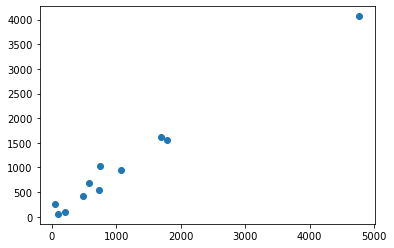

In [92]:
plt.scatter(y_test,predada)

* The scatter plot shows the relation between y_test and predicted data.

In [94]:
# Saving the best model 

In [95]:
import joblib

In [96]:
joblib.dump(ada,'Covid19_dataset.pkl')

['Covid19_dataset.pkl']